Kelompok 3
*   Intan Dwi Febryanti (22/494760/PA/21285)
*   Dhanada Santika Putri (22/497239/PA/21407)
*   Asyraf Nur Ardliansyah (22/497649/PA/21439)

# Preprocessing

In [ ]:
!pip install --no-cache-dir Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 8.6 MB/s eta 0:00:00


In [ ]:
!pip show Sastrawi

Name: Sastrawi
Version: 1.0.1
Summary: Library for stemming Indonesian (Bahasa) text
Home-page: https://github.com/har07/sastrawi
Author: Hanif Amal Robbani
Author-email: dev.har07@gmail.com
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: 
Required-by: 


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
# Stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
# Download stopwords untuk bahasa Indonesia
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

# Menambahkan ekstra stopword di luar library
extra_stopwords = {
    "yang", "dan", "di", "ke", "dari", "untuk", "pada", "oleh", "ini",
    "sebagai", "dengan", "adalah", "atau", "agar", "sehingga",
    "maka", "jika", "karena", "dapat", "dalam", "terhadap",
    "username", "[USERNAME]", "saya", "ak", "gw", "gue", "gua", "nya", "ya", "yap",
    "y", "w", "u", "ya", "1", "2", "3", "4", "5","6", "7", "8", "9", "0",
    "kali", "doi", "anak", "orang", "oke", "kalo", "oy", "krn", "dpt", "sik",
    "yaudah", "klo", "krn", "nggak", "yg", "gt", "eh", "emang", "aja", "tsb", "lg", "ga"
}
stop_words.update(extra_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(f"Total Stop Words: {len(stop_words)}")

Total Stop Words: 800


In [ ]:
# Inisialisasi stemmer bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()

## Train Dataset

In [ ]:
# Load train dataset
df = pd.read_csv("train_preprocess.csv")
df

,label,tweet
0,happy,Ini adalah hal yang paling membahagiakan saat ...
1,anger,[USERNAME] [USERNAME] Dari pertama [USERNAME] ...
2,fear,yaudah kalo emang belum berani potong rambut p...
3,fear,"Jadi semalam, gw rekap, eh intinya yg gw usaha..."
4,anger,temen2 masa kecil yang turned out being asshol...
...,...,...
3516,fear,[USERNAME] [USERNAME] Bcs doi w anak pelayaran...
3517,anger,"Sekali , dua kali , tiga kali , lama2 bosan ju..."
3518,anger,[USERNAME] [USERNAME] [USERNAME] [USERNAME] [U...
3519,fear,Aku takut tulisan ini terbaca di saat kamu ngg...


In [ ]:
# Pastikan kolom yang akan diproses ada
if 'tweet' in df.columns:
    # Preprocessing function
    def preprocess_text(text):
        text = str(text).lower()  # Lowercasing
        words = text.split()
        words = [word for word in words if word not in stop_words]  # Stopwords removal
        words = [stemmer.stem(word) for word in words]  # Stemming
        return ' '.join(words)

    # Terapkan preprocessing
    df['Processed_Text'] = df['tweet'].apply(preprocess_text)

    # Simpan hasil
    output_path = "processed_data.csv"
    df.to_csv(output_path, index=False)
    print(f"Preprocessing 1 selesai! Data disimpan di: {output_path}")
else:
    print("Kolom 'tweet' tidak ditemukan dalam dataset.")

df02 = pd.read_csv("processed_data.csv")

# Preprocessing 2
if 'Processed_Text' in df02.columns:
    # Preprocessing function
    def preprocess_text(text):
        text = str(text).lower()  # Lowercasing
        words = text.split()
        words = [word for word in words if word not in stop_words]  # Stopwords removal
        words = [stemmer.stem(word) for word in words]  # Stemming
        return ' '.join(words)

    # Terapkan preprocessing
    df02['Processed_Text_Update'] = df02['Processed_Text'].apply(preprocess_text)

    # Simpan hasil
    output_path = "train.csv"
    df02.to_csv(output_path, index=False)
    print(f"Preprocessing 2 selesai! Data disimpan di: {output_path}")
else:
    print("Kolom 'Processed_Text' tidak ditemukan dalam dataset.")


Preprocessing 1 selesai! Data disimpan di: processed_data.csv
Preprocessing 2 selesai! Data disimpan di: train.csv


In [ ]:
df03 = pd.read_csv("train.csv")
df03

,label,tweet,Processed_Text,Processed_Text_Update
0,happy,Ini adalah hal yang paling membahagiakan saat ...,bahagia bias foto elf returnofthelittleprince ...,bahagia bias foto elf returnofthelittleprince ...
1,anger,[USERNAME] [USERNAME] Dari pertama [USERNAME] ...,username username username duduk bangku jabat ...,duduk bangku jabat rakyat dengar hasil kerja p...
2,fear,yaudah kalo emang belum berani potong rambut p...,berani potong rambut pendek nanti udah nyaman ...,berani potong rambut pendek udah nyaman selama...
3,fear,"Jadi semalam, gw rekap, eh intinya yg gw usaha...",malam rekap inti usahain kerja zero samsek pre...,malam rekap inti usahain kerja zero samsek pre...
4,anger,temen2 masa kecil yang turned out being asshol...,temen2 turned out being asshole cewe ukhti2 hi...,temen2 turned out being asshole cewe ukhti2 hi...
...,...,...,...,...
3516,fear,[USERNAME] [USERNAME] Bcs doi w anak pelayaran...,username username bcs layar tp emg beneran sih...,bcs layar tp emg beneran sih tinggal ketemu cm...
3517,anger,"Sekali , dua kali , tiga kali , lama2 bosan ju...",lama2 bosan ya ulang lubang sama lubang sen...,lama2 bosan ulang lubang lubang sengaja spy kes
3518,anger,[USERNAME] [USERNAME] [USERNAME] [USERNAME] [U...,username username username username username u...,informasi giat dana desa kirim hastag mantion
3519,fear,Aku takut tulisan ini terbaca di saat kamu ngg...,takut tulis baca ngerti rasain takut tulis bac...,takut tulis baca ngerti rasain takut tulis bac...


## Validation Dataset

In [ ]:
# Load valid dataset
df1 = pd.read_csv("valid_preprocess.csv")
df1

,label,tweet
0,anger,[USERNAME] jaringannya mati ya? Tidak bisa dib...
1,anger,It's like a circle of stupidity. Atlit gak diu...
2,anger,[USERNAME] [USERNAME] [USERNAME] [USERNAME] [U...
3,happy,[USERNAME] Selamat Siang Sahabat Pos. Kiriman ...
4,happy,"Di hari ini, yap tepat di tanggal 23 juli dima..."
...,...,...
435,anger,[USERNAME] [USERNAME] Mekanisme pemilihan dire...
436,fear,Ngasih tehaer ke keponakan. Baju dua biji cela...
437,love,HAHAHA BODO AMAT DEEHHH YG PENTING DI VIDEO IN...
438,sadness,"Langsung mewek baca thread ini, keren maksimal..."


In [ ]:
# Pastikan kolom yang akan diproses ada
if 'tweet' in df1.columns:
    # Preprocessing function
    def preprocess_text(text):
        text = str(text).lower()  # Lowercasing
        words = text.split()
        words = [word for word in words if word not in stop_words]  # Stopwords removal
        words = [word for word in words if word not in extra_stopwords]
        words = [stemmer.stem(word) for word in words]  # Stemming
        return ' '.join(words)

    # Terapkan preprocessing
    df1['Processed_Text'] = df1['tweet'].apply(preprocess_text)

    # Simpan hasil
    output_path = "processed_data1.csv"
    df1.to_csv(output_path, index=False)
    print(f"Preprocessing 1 selesai! Data disimpan di: {output_path}")
else:
    print("Kolom 'tweet' tidak ditemukan dalam dataset.")

df12 = pd.read_csv("processed_data1.csv")

# Preprocessing 2
if 'Processed_Text' in df12.columns:
    # Preprocessing function
    def preprocess_text(text):
        text = str(text).lower()  # Lowercasing
        words = text.split()
        words = [word for word in words if word not in stop_words]  # Stopwords removal
        words = [stemmer.stem(word) for word in words]  # Stemming
        return ' '.join(words)

    # Terapkan preprocessing
    df12['Processed_Text_Update'] = df12['Processed_Text'].apply(preprocess_text)

    # Simpan hasil
    output_path = "valid.csv"
    df12.to_csv(output_path, index=False)
    print(f"Preprocessing 2 selesai! Data disimpan di: {output_path}")
else:
    print("Kolom 'Processed_Text' tidak ditemukan dalam dataset.")

Preprocessing 1 selesai! Data disimpan di: processed_data1.csv
Preprocessing 2 selesai! Data disimpan di: valid.csv


In [ ]:
df13 = pd.read_csv("valid.csv")
df13

,label,tweet,Processed_Text,Processed_Text_Update
0,anger,[USERNAME] jaringannya mati ya? Tidak bisa dib...,username jaring mati ya buka mobile jkn puskes...,jaring mati buka mobile jkn puskesmes trus piy...
1,anger,It's like a circle of stupidity. Atlit gak diu...,it s like a circle of stupidity atlit gak diur...,it s like a circle of stupidity atlit gak diur...
2,anger,[USERNAME] [USERNAME] [USERNAME] [USERNAME] [U...,username username username username username u...,koq ngabalin tokoh gak salah tuh hidung gede n...
3,happy,[USERNAME] Selamat Siang Sahabat Pos. Kiriman ...,username selamat siang sahabat pos kirim terim...,selamat siang sahabat pos kirim terima sahabat...
4,happy,"Di hari ini, yap tepat di tanggal 23 juli dima...",ini tanggal 23 juli mana sangatsangat special ...,tanggal 23 juli sangatsangat special makasih m...
...,...,...,...,...
435,anger,[USERNAME] [USERNAME] Mekanisme pemilihan dire...,username username mekanisme pilih direksi komi...,mekanisme pilih direksi komisaris dgn gmna son...
436,fear,Ngasih tehaer ke keponakan. Baju dua biji cela...,ngasih tehaer keponakan baju biji celana biji ...,ngasih tehaer keponakan baju biji celana biji ...
437,love,HAHAHA BODO AMAT DEEHHH YG PENTING DI VIDEO IN...,hahaha bodo deehhh video frame danielsayang ba...,hahaha bodo deehhh video frame danielsayang ba...
438,sadness,"Langsung mewek baca thread ini, keren maksimal...",langsung mewek baca thread ini keren maksimal ...,langsung mewek baca thread keren maksimal usah...


## Test Dataset

In [ ]:
# Load test dataset
df2 = pd.read_csv("test_preprocess.csv")
df2

,label,tweet
0,love,Pixy ini kok lama-lama gemesim yaaaa. Setelah ...
1,fear,Penyakit hepatitis B 100x lebih infeksius dari...
2,fear,[USERNAME] [USERNAME] [USERNAME] Gw lebih khaw...
3,anger,Kemerdekaan adalah hak segala bangsa ...( Kec ...
4,happy,"Selamat pak [USERNAME] resmi jadi bapak, seked..."
...,...,...
435,sadness,Ramadhan udah masuk hari yang ke-20 aja. tapi ...
436,sadness,kalo gue sik emang abis kehilangan seseorang y...
437,fear,"aku dong malem ini checkup darah,, ok warning ..."
438,anger,Dan besok musti pagi2 tangsel-bogor.. Dan (lag...


In [ ]:
# Pastikan kolom yang akan diproses ada
if 'tweet' in df2.columns:
    # Preprocessing function
    def preprocess_text(text):
        text = str(text).lower()  # Lowercasing
        words = text.split()
        words = [word for word in words if word not in stop_words]  # Stopwords removal
        words = [word for word in words if word not in extra_stopwords]
        words = [stemmer.stem(word) for word in words]  # Stemming
        return ' '.join(words)

    # Terapkan preprocessing
    df2['Processed_Text'] = df2['tweet'].apply(preprocess_text)

    # Simpan hasil
    output_path = "processed_data2.csv"
    df2.to_csv(output_path, index=False)
    print(f"Preprocessing 1 selesai! Data disimpan di: {output_path}")
else:
    print("Kolom 'tweet' tidak ditemukan dalam dataset.")

df22 = pd.read_csv("processed_data2.csv")

# Preprocessing 2
if 'Processed_Text' in df22.columns:
    # Preprocessing function
    def preprocess_text(text):
        text = str(text).lower()  # Lowercasing
        words = text.split()
        words = [word for word in words if word not in stop_words]  # Stopwords removal
        words = [stemmer.stem(word) for word in words]  # Stemming
        return ' '.join(words)

    # Terapkan preprocessing
    df22['Processed_Text_Update'] = df22['Processed_Text'].apply(preprocess_text)

    # Simpan hasil
    output_path = "test.csv"
    df22.to_csv(output_path, index=False)
    print(f"Preprocessing 2 selesai! Data disimpan di: {output_path}")
else:
    print("Kolom 'Processed_Text' tidak ditemukan dalam dataset.")

Preprocessing 1 selesai! Data disimpan di: processed_data2.csv
Preprocessing 2 selesai! Data disimpan di: test.csv


In [ ]:
df23 = pd.read_csv("test.csv")
df23

,label,tweet,Processed_Text,Processed_Text_Update
0,love,Pixy ini kok lama-lama gemesim yaaaa. Setelah ...,pixy lama gemesim yaaaa jatuh cinta lip cream ...,pixy gemesim yaaaa jatuh cinta lip cream kayak...
1,fear,Penyakit hepatitis B 100x lebih infeksius dari...,sakit hepatitis b 100x infeksius hiv aids duhh...,sakit hepatitis b 100x infeksius hiv aids duhh...
2,fear,[USERNAME] [USERNAME] [USERNAME] Gw lebih khaw...,username username username khawatir ahok jd ju...,khawatir ahok jd jurkamnya jokowi bro nemo mov...
3,anger,Kemerdekaan adalah hak segala bangsa ...( Kec ...,merdeka hak bangsa kec yahudi kurdi cataloni...,merdeka hak bangsa kec yahudi kurdi catalonia ...
4,happy,"Selamat pak [USERNAME] resmi jadi bapak, seked...",selamat username resmi bapak dar saran si jago...,selamat resmi dar saran si jago kasih dengar l...
...,...,...,...,...
435,sadness,Ramadhan udah masuk hari yang ke-20 aja. tapi ...,ramadhan udah masuk ke-20 aja saya gin gin aja...,ramadhan udah masuk ke-20 gin gin ubah gatau t...
436,sadness,kalo gue sik emang abis kehilangan seseorang y...,abis hilang deket bilang cuman tahap bangunin ...,abis hilang deket bilang cuman tahap bangunin ...
437,fear,"aku dong malem ini checkup darah,, ok warning ...",malem checkup darah ok warning tensi kolestero...,malem checkup darah ok warning tensi kolestero...
438,anger,Dan besok musti pagi2 tangsel-bogor.. Dan (lag...,besok musti pagi2 tangsel-bogor lagi gabisa ng...,besok musti pagi2 tangsel-bogor gabisa ngtap p...


# Model Implementation

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from transformers import BertTokenizer, TFBertModel
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

# Enable mixed precision to reduce memory usage
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Load datasets
train_df = pd.read_csv("train.csv")
val_df = pd.read_csv("valid.csv")
test_df = pd.read_csv("test.csv")

# Extract text and labels
train_texts = train_df['tweet'].astype(str).tolist()
val_texts = val_df['tweet'].astype(str).tolist()
test_texts = test_df['tweet'].astype(str).tolist()

# One-Hot Encode Labels
encoder = OneHotEncoder(sparse_output=False)
train_labels = encoder.fit_transform(train_df[['label']])
val_labels = encoder.transform(val_df[['label']])
test_labels = encoder.transform(test_df[['label']])

KeyboardInterrupt: 

## IndoBert + LSTM

In [ ]:
def extract_bert_embeddings_in_batches(texts, tokenizer, model, batch_size=32):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        inputs = tokenizer(batch_texts, padding=True, truncation=True, return_tensors="tf", max_length=100)
        outputs = model(inputs.input_ids, attention_mask=inputs.attention_mask)
        batch_embeddings = outputs.last_hidden_state[:, 0, :].numpy()
        if batch_embeddings.shape[0] > 0:
            embeddings.append(batch_embeddings)
    return np.vstack(embeddings) if embeddings else np.array([])

In [ ]:
# Define LSTM Model Function
def build_lstm_model(input_shape, num_classes):
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.4),
        LSTM(64),
        BatchNormalization(),
        Dropout(0.4),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
num_classes = train_labels.shape[1]
print(f"Number of classes in labels: {num_classes}")

Number of classes in labels: 5


In [ ]:
#Load IndoBERT Model
tokenizer_indo = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p2")
bert_model_indo = TFBertModel.from_pretrained("indobenchmark/indobert-base-p2")

train_indo = extract_bert_embeddings_in_batches(train_texts, tokenizer_indo, bert_model_indo)
val_indo = extract_bert_embeddings_in_batches(val_texts, tokenizer_indo, bert_model_indo)
test_indo = extract_bert_embeddings_in_batches(test_texts, tokenizer_indo, bert_model_indo)

print("train_indo shape:", train_indo.shape)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/656M [00:00<?, ?B/s]

Some layers from the model checkpoint at indobenchmark/indobert-base-p2 were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at indobenchmark/indobert-base-p2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


train_indo shape: (3521, 768)


In [ ]:
# Reshape embeddings to fit LSTM expected input shape (samples, timesteps, features)
train_indo = np.expand_dims(train_indo, axis=1)
val_indo = np.expand_dims(val_indo, axis=1)
test_indo = np.expand_dims(test_indo, axis=1)

print("Updated train_indo shape:", train_indo.shape)

Updated train_indo shape: (3521, 1, 768)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.2880 - loss: 1.8342 - val_accuracy: 0.4227 - val_loss: 1.5302 - learning_rate: 5.0000e-04
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4692 - loss: 1.3266 - val_accuracy: 0.4659 - val_loss: 1.3914 - learning_rate: 5.0000e-04
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5379 - loss: 1.1592 - val_accuracy: 0.5432 - val_loss: 1.2096 - learning_rate: 5.0000e-04
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5551 - loss: 1.1107 - val_accuracy: 0.5909 - val_loss: 1.0780 - learning_rate: 5.0000e-04
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5779 - loss: 1.0721 - val_accuracy: 0.5818 - val_loss: 1.0623 - learning_rate: 5.0000e-04
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6029 - loss: 0.9994 - val_accuracy: 0.5682 - val_loss: 1.0663 - learning_rate: 5.0000e-04
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - ac

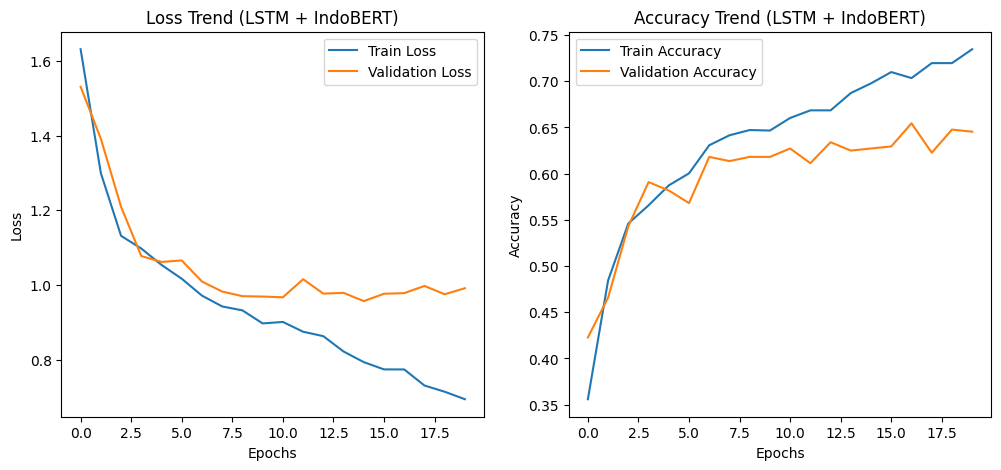

In [ ]:
# Train LSTM + IndoBERT
import matplotlib.pyplot as plt

if train_indo.size > 0:
    lstm_model_indo = build_lstm_model((train_indo.shape[1], train_indo.shape[2]), num_classes)
    optimizer = Adam(learning_rate=0.0005)
    lstm_model_indo.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    callbacks = [
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1),
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    ]

    # Train the model and store training history
    history = lstm_model_indo.fit(
        train_indo, train_labels,
        validation_data=(val_indo, val_labels),
        epochs=20, batch_size=32,
        callbacks=callbacks
    )

    # Plot training history (loss and accuracy)
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Plot Loss Trend
    ax[0].plot(history.history['loss'], label='Train Loss')
    ax[0].plot(history.history['val_loss'], label='Validation Loss')
    ax[0].set_title('Loss Trend (LSTM + IndoBERT)')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend()

    # Plot Accuracy Trend
    ax[1].plot(history.history['accuracy'], label='Train Accuracy')
    ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax[1].set_title('Accuracy Trend (LSTM + IndoBERT)')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()

    plt.show()

## mBERT + LSTM

In [ ]:
# Load mBERT Model
tokenizer_mbert = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
bert_model_mbert = TFBertModel.from_pretrained("bert-base-multilingual-cased")

train_mbert = extract_bert_embeddings_in_batches(train_texts, tokenizer_mbert, bert_model_mbert)
val_mbert = extract_bert_embeddings_in_batches(val_texts, tokenizer_mbert, bert_model_mbert)
test_mbert = extract_bert_embeddings_in_batches(test_texts, tokenizer_mbert, bert_model_mbert)

print("train_mbert shape:", train_mbert.shape)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

train_mbert shape: (3521, 768)


In [ ]:
# Ensure embeddings are 3D (samples, timesteps, features)
train_mbert = np.expand_dims(train_mbert, axis=1)
val_mbert = np.expand_dims(val_mbert, axis=1)
test_mbert = np.expand_dims(test_mbert, axis=1)

print("Updated train_mbert shape:", train_mbert.shape)

Updated train_mbert shape: (3521, 1, 768)


Epoch 1/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.2472 - loss: 1.8986 - val_accuracy: 0.2250 - val_loss: 1.5910 - learning_rate: 5.0000e-04
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3684 - loss: 1.5202 - val_accuracy: 0.3205 - val_loss: 1.5550 - learning_rate: 5.0000e-04
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4413 - loss: 1.3630 - val_accuracy: 0.3568 - val_loss: 1.4903 - learning_rate: 5.0000e-04
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4256 - loss: 1.3583 - val_accuracy: 0.3750 - val_loss: 1.4184 - learning_rate: 5.0000e-04
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4378 - loss: 1.3073 - val_accuracy: 0.4136 - val_loss: 1.3770 - learning_rate: 5.0000e-04
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4732 - loss: 1.2875 - val_accuracy: 0.4045 - val_loss: 1.3852 - learning_rate: 5.0000e-04
Epoch 7/20
108/111 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accu

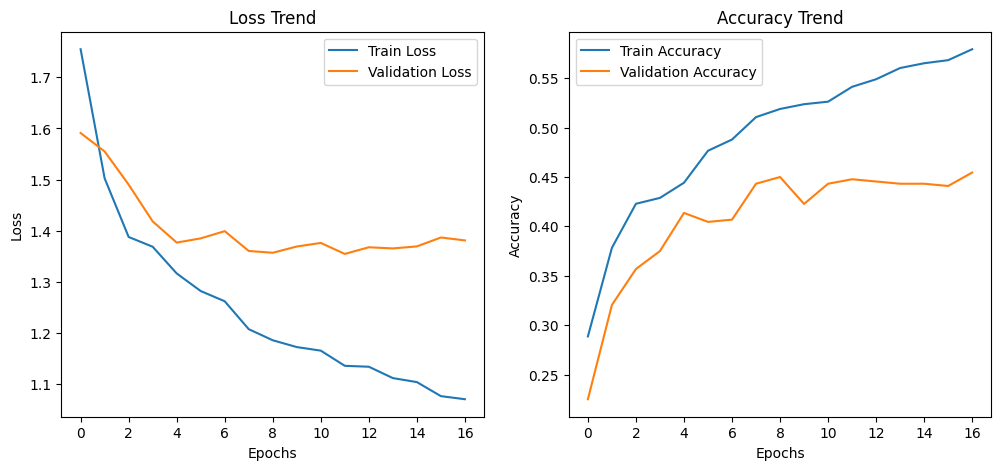

In [ ]:
# Train LSTM + mBERT
import matplotlib.pyplot as plt

if train_mbert.size > 0:
    lstm_model_mbert = build_lstm_model((train_mbert.shape[1], train_mbert.shape[2]), num_classes)
    optimizer = Adam(learning_rate=0.0005)
    lstm_model_mbert.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    callbacks = [
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1),
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    ]

    # Train the model and store history
    history = lstm_model_mbert.fit(
        train_mbert, train_labels,
        validation_data=(val_mbert, val_labels),
        epochs=20, batch_size=32,
        callbacks=callbacks
    )

    # Plot loss and accuracy trends
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Plot loss
    ax[0].plot(history.history['loss'], label='Train Loss')
    ax[0].plot(history.history['val_loss'], label='Validation Loss')
    ax[0].set_title('Loss Trend')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend()

    # Plot accuracy
    ax[1].plot(history.history['accuracy'], label='Train Accuracy')
    ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax[1].set_title('Accuracy Trend')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()

    plt.show()

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step

LSTM + IndoBERT Performance:
              precision    recall  f1-score   support

       anger       0.66      0.74      0.70       110
        fear       0.62      0.66      0.64        65
       happy       0.71      0.70      0.71       101
        love       0.67      0.83      0.74        64
     sadness       0.59      0.41      0.48       100

    accuracy                           0.66       440
   macro avg       0.65      0.67      0.65       440
weighted avg       0.65      0.66      0.65       440



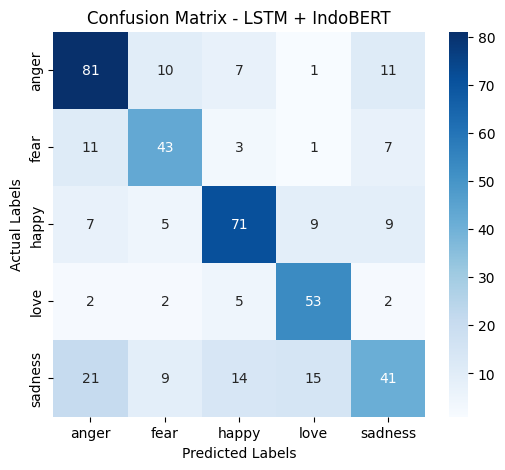

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step

LSTM + mBERT Performance:
              precision    recall  f1-score   support

       anger       0.43      0.56      0.49       110
        fear       0.35      0.37      0.36        65
       happy       0.44      0.48      0.45       101
        love       0.72      0.56      0.63        64
     sadness       0.35      0.24      0.29       100

    accuracy                           0.44       440
   macro avg       0.46      0.44      0.44       440
weighted avg       0.44      0.44      0.44       440



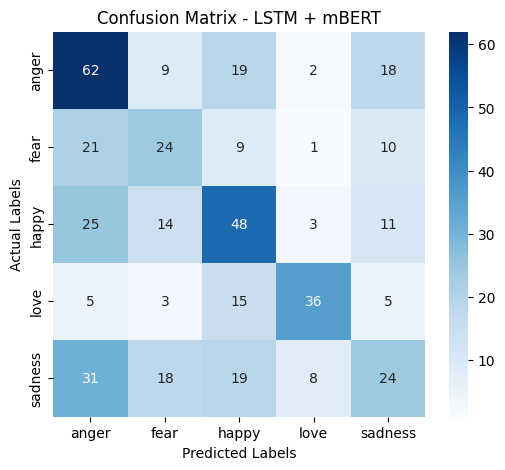

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Function to evaluate model and plot confusion matrix
def evaluate_model(model, test_data, test_labels, model_name, class_names):
    preds = model.predict(test_data)
    preds_labels = np.argmax(preds, axis=1)
    actual_labels = np.argmax(test_labels, axis=1)

    # Print Classification Report
    print(f"\n{model_name} Performance:")
    print(classification_report(actual_labels, preds_labels, target_names=class_names))

    # Compute Confusion Matrix
    cm = confusion_matrix(actual_labels, preds_labels)

    # Plot Confusion Matrix
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Class names (ensure encoder.categories_[0] provides correct labels)
class_names = encoder.categories_[0]

# Evaluate LSTM + IndoBERT
if train_indo.size > 0:
    evaluate_model(lstm_model_indo, test_indo, test_labels, "LSTM + IndoBERT", class_names)

# Evaluate LSTM + mBERT
if train_mbert.size > 0:
    evaluate_model(lstm_model_mbert, test_mbert, test_labels, "LSTM + mBERT", class_names)

## Sentence Transformers + SVM



In [ ]:
!pip install -U sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
from sentence_transformers import SentenceTransformer

encoder = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
import pandas as pd

In [ ]:
def preprocess_data(raw_data, column):
  raw_data = raw_data[column].astype(str).tolist()
  return encoder.encode(raw_data, show_progress_bar = True)

In [ ]:
# Load dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
valid = pd.read_csv('valid.csv')

train

,label,tweet,Processed_Text,Processed_Text_Update
0,happy,Ini adalah hal yang paling membahagiakan saat ...,bahagia bias foto elf returnofthelittleprince ...,bahagia bias foto elf returnofthelittleprince ...
1,anger,[USERNAME] [USERNAME] Dari pertama [USERNAME] ...,username username username duduk bangku jabat ...,duduk bangku jabat rakyat dengar hasil kerja p...
2,fear,yaudah kalo emang belum berani potong rambut p...,berani potong rambut pendek nanti udah nyaman ...,berani potong rambut pendek udah nyaman selama...
3,fear,"Jadi semalam, gw rekap, eh intinya yg gw usaha...",malam rekap inti usahain kerja zero samsek pre...,malam rekap inti usahain kerja zero samsek pre...
4,anger,temen2 masa kecil yang turned out being asshol...,temen2 turned out being asshole cewe ukhti2 hi...,temen2 turned out being asshole cewe ukhti2 hi...
...,...,...,...,...
3516,fear,[USERNAME] [USERNAME] Bcs doi w anak pelayaran...,username username bcs layar tp emg beneran sih...,bcs layar tp emg beneran sih tinggal ketemu cm...
3517,anger,"Sekali , dua kali , tiga kali , lama2 bosan ju...",lama2 bosan ya ulang lubang sama lubang sen...,lama2 bosan ulang lubang lubang sengaja spy kes
3518,anger,[USERNAME] [USERNAME] [USERNAME] [USERNAME] [U...,username username username username username u...,informasi giat dana desa kirim hastag mantion
3519,fear,Aku takut tulisan ini terbaca di saat kamu ngg...,takut tulis baca ngerti rasain takut tulis bac...,takut tulis baca ngerti rasain takut tulis bac...


In [ ]:
# Use Sentence Transformers to encode the dataset into numpy
train_encoded = preprocess_data(train, 'Processed_Text_Update')
test_encoded = preprocess_data(test, 'Processed_Text_Update')
valid_encoded = preprocess_data(valid, 'Processed_Text_Update')

Batches:   0%|          | 0/111 [00:00<?, ?it/s]

Batches:   0%|          | 0/14 [00:00<?, ?it/s]

Batches:   0%|          | 0/14 [00:00<?, ?it/s]

In [ ]:
# Check Shape
train_encoded.shape

(3521, 384)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Create and train the SVM classifier
svm_clf = SVC(kernel='linear', probability=True)
svm_clf.fit(train_encoded, train['label'])

SVC(kernel='linear', probability=True)

In [ ]:
# Predict and evaluate on the validation set
valid_preds = svm_clf.predict(valid_encoded)
print("Validation Classification Report:")
print(classification_report(valid['label'], valid_preds))

# Predict and evaluate on the test set
test_preds = svm_clf.predict(test_encoded)
print("Test Classification Report:")
print(classification_report(test['label'], test_preds))

Validation Classification Report:
              precision    recall  f1-score   support

       anger       0.47      0.59      0.53       110
        fear       0.65      0.37      0.47        65
       happy       0.53      0.49      0.51       102
        love       0.64      0.66      0.65        64
     sadness       0.40      0.42      0.41        99

    accuracy                           0.51       440
   macro avg       0.54      0.51      0.51       440
weighted avg       0.52      0.51      0.51       440

Test Classification Report:
              precision    recall  f1-score   support

       anger       0.39      0.51      0.44       110
        fear       0.45      0.32      0.38        65
       happy       0.44      0.32      0.37       101
        love       0.56      0.50      0.53        64
     sadness       0.36      0.43      0.39       100

    accuracy                           0.42       440
   macro avg       0.44      0.42      0.42       440
weighted avg   

In [ ]:
# Scaled Embedding
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on training embeddings and transform
train_embeddings_scaled = scaler.fit_transform(train_encoded)
valid_embeddings_scaled = scaler.transform(valid_encoded)
test_embeddings_scaled  = scaler.transform(test_encoded)

# Train SVM on scaled embeddings
svm_clf_scaled = SVC(kernel='linear', probability=True)
svm_clf_scaled.fit(train_embeddings_scaled, train['label'])

# Evaluate on validation and test sets
valid_preds_scaled = svm_clf_scaled.predict(valid_embeddings_scaled)
print("Validation Report (Scaled):")
print(classification_report(valid['label'], valid_preds_scaled))

test_preds_scaled = svm_clf_scaled.predict(test_embeddings_scaled)
print("Test Report (Scaled):")
print(classification_report(test['label'], test_preds_scaled))

Validation Report (Scaled):
              precision    recall  f1-score   support

       anger       0.43      0.56      0.49       110
        fear       0.53      0.48      0.50        65
       happy       0.46      0.44      0.45       102
        love       0.55      0.56      0.55        64
     sadness       0.29      0.22      0.25        99

    accuracy                           0.45       440
   macro avg       0.45      0.45      0.45       440
weighted avg       0.44      0.45      0.44       440

Test Report (Scaled):
              precision    recall  f1-score   support

       anger       0.43      0.50      0.46       110
        fear       0.40      0.45      0.42        65
       happy       0.42      0.39      0.40       101
        love       0.52      0.50      0.51        64
     sadness       0.37      0.32      0.34       100

    accuracy                           0.42       440
   macro avg       0.43      0.43      0.43       440
weighted avg       0.42    

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_clf, train_encoded, train['label'], cv=5, scoring='f1_macro')
print("Cross-validation F1 scores:", scores)
print("Average F1 score:", scores.mean())

Cross-validation F1 scores: [0.45908389 0.46442312 0.45853306 0.48608014 0.47371221]
Average F1 score: 0.46836648423253757


Confusion Matrix:
[[56 13 11  4 26]
 [21 21  7  2 14]
 [29  6 32 10 24]
 [ 9  3  7 32 13]
 [29  4 16  9 42]]

Classification Report:
              precision    recall  f1-score   support

       anger       0.39      0.51      0.44       110
        fear       0.45      0.32      0.38        65
       happy       0.44      0.32      0.37       101
        love       0.56      0.50      0.53        64
     sadness       0.35      0.42      0.38       100

    accuracy                           0.42       440
   macro avg       0.44      0.41      0.42       440
weighted avg       0.43      0.42      0.41       440



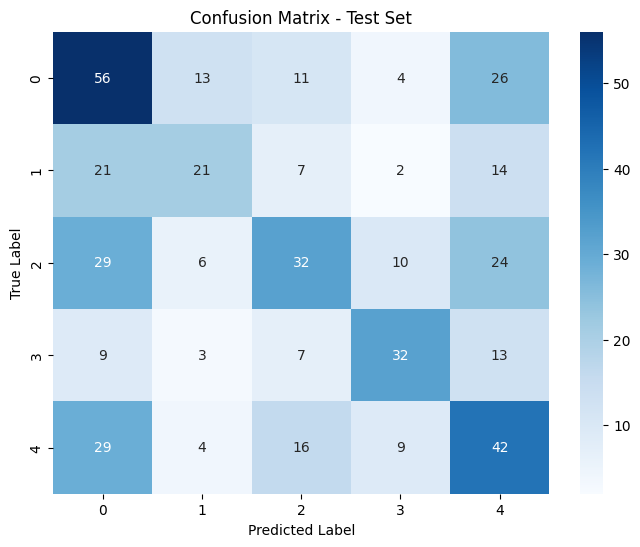

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions for the test set
test_preds = svm_clf.predict(test_encoded)

# Compute the confusion matrix
cm = confusion_matrix(test['label'], test_preds)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(test['label'], test_preds))

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Set')
plt.show()

## LSTM + FastText without Pre-trained

In [ ]:
import numpy as np
import pandas as pd

# Load
train_df = pd.read_csv('train.csv')
valid_df = pd.read_csv('valid.csv')
test_df  = pd.read_csv('test.csv')

# Ensure the text column is treated as a string and fill any missing values.
for df in [train_df, valid_df, test_df]:
    df['Processed_Text_Update'] = df['Processed_Text_Update'].fillna("").astype(str)

# Inspect the first few rows of the training data
print(train_df.head())

# Optional: Check the unique labels in your dataset
print("Unique labels in training data:", train_df['label'].unique())

   label                                              tweet  \
0  happy  Ini adalah hal yang paling membahagiakan saat ...   
1  anger  [USERNAME] [USERNAME] Dari pertama [USERNAME] ...   
2   fear  yaudah kalo emang belum berani potong rambut p...   
3   fear  Jadi semalam, gw rekap, eh intinya yg gw usaha...   
4  anger  temen2 masa kecil yang turned out being asshol...   

                                      Processed_Text  \
0  bahagia bias foto elf returnofthelittleprince ...   
1  username username username duduk bangku jabat ...   
2  berani potong rambut pendek nanti udah nyaman ...   
3  malam rekap inti usahain kerja zero samsek pre...   
4  temen2 turned out being asshole cewe ukhti2 hi...   

                               Processed_Text_Update  
0  bahagia bias foto elf returnofthelittleprince ...  
1  duduk bangku jabat rakyat dengar hasil kerja p...  
2  berani potong rambut pendek udah nyaman selama...  
3  malam rekap inti usahain kerja zero samsek pre...  
4  temen2

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define parameters
MAX_NUM_WORDS = 20000     # Maximum number of words to consider in the vocabulary
MAX_SEQUENCE_LENGTH = 100 # Fixed length for all sequences (pad/truncate as needed)

# Initialize and fit the tokenizer on training text
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(train_df['Processed_Text_Update'].values)

# Convert texts to sequences (list of word indices)
train_sequences = tokenizer.texts_to_sequences(train_df['Processed_Text_Update'].values)
valid_sequences = tokenizer.texts_to_sequences(valid_df['Processed_Text_Update'].values)
test_sequences  = tokenizer.texts_to_sequences(test_df['Processed_Text_Update'].values)

# Pad sequences so that each input has the same length
train_data = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
valid_data = pad_sequences(valid_sequences, maxlen=MAX_SEQUENCE_LENGTH)
test_data  = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder and encode labels for all sets
le = LabelEncoder()

# Fit on training labels and transform all label sets
train_labels = le.fit_transform(train_df['label'].values)
valid_labels = le.transform(valid_df['label'].values)
test_labels  = le.transform(test_df['label'].values)

# Convert labels to float32 (ensuring proper dtype for the loss function)
train_labels = train_labels.astype(np.float32)
valid_labels = valid_labels.astype(np.float32)
test_labels  = test_labels.astype(np.float32)

# Optional: Print the mapping so you know which class is 0 and which is 1.
print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

Label mapping: {'anger': 0, 'fear': 1, 'happy': 2, 'love': 3, 'sadness': 4}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.optimizers import Adam

# Determine vocabulary size from tokenizer; add 1 for the reserved index (0)
word_index = tokenizer.word_index
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)

# Set an embedding dimension (e.g., 300)
embedding_dim = 300

# Build the model
model = Sequential()

# Embedding layer with random initialization (embeddings will be learned during training)
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_dim,
                    input_length=MAX_SEQUENCE_LENGTH,
                    trainable=True))

# Add a SpatialDropout1D layer for regularization
model.add(SpatialDropout1D(0.2))

# Add an LSTM layer with dropout
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))

# For binary classification, use a single unit with sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# Compile the model using binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-3),
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_2                  │ ?                           │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define training parameters
batch_size = 128
epochs = 10

# Train the model using training data and validate on validation data
history = model.fit(train_data,
                    train_labels,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(valid_data, valid_labels))

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 390ms/step - accuracy: 0.1577 - loss: -1.7894 - val_accuracy: 0.1477 - val_loss: -9.7732
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 311ms/step - accuracy: 0.1444 - loss: -11.2021 - val_accuracy: 0.1477 - val_loss: -14.7454
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 325ms/step - accuracy: 0.1542 - loss: -15.0912 - val_accuracy: 0.1477 - val_loss: -17.9758
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 366ms/step - accuracy: 0.1467 - loss: -19.0107 - val_accuracy: 0.1477 - val_loss: -21.0529
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 359ms/step - accuracy: 0.1432 - loss: -21.5328 - val_accuracy: 0.1477 - val_loss: -23.9830
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 366ms/step - accuracy: 0.1327 - loss: -25.0853 - val_accuracy: 0.1477 - val_loss: -26.9005
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 399ms/step - accuracy: 0.1454 - loss: -27.3468 - val_accuracy: 0.1477 - val_loss: -29.7186
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 306ms/step - accuracy: 0.1405

In [ ]:
# Evaluate the trained model on the test set
loss, accuracy = model.evaluate(test_data, test_labels, verbose=0)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

Test Loss: -38.1815, Test Accuracy: 0.1477


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step
Confusion Matrix:
[[  0 110   0   0   0]
 [  0  65   0   0   0]
 [  0 101   0   0   0]
 [  0  64   0   0   0]
 [  0 100   0   0   0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       110
         1.0       0.15      1.00      0.26        65
         2.0       0.00      0.00      0.00       101
         3.0       0.00      0.00      0.00        64
         4.0       0.00      0.00      0.00       100

    accuracy                           0.15       440
   macro avg       0.03      0.20      0.05       440
weighted avg       0.02      0.15      0.04       440



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


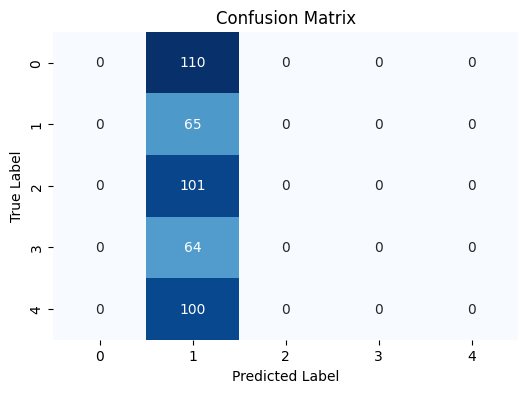

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Obtain prediction probabilities for test data
pred_probs = model.predict(test_data)

# For binary classification, threshold at 0.5 to obtain predicted labels
pred_labels = (pred_probs > 0.5).astype("int32")

# Compute the confusion matrix (ensure test_labels are the correctly encoded numeric labels)
cm = confusion_matrix(test_labels, pred_labels)

# Print the confusion matrix and a detailed classification report
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(test_labels, pred_labels))

# Plot the confusion matrix for a better visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


## LSTM + FastText using Pre-trained

In [ ]:
import numpy as np
import pandas as pd

# Load your CSV files into DataFrames
train_df = pd.read_csv('train.csv')
valid_df = pd.read_csv('valid.csv')
test_df  = pd.read_csv('test.csv')

# Ensure the text column is treated as a string and fill any missing values.
# (Replace 'Processed_Text_Update' with your actual text column name if different.)
for df in [train_df, valid_df, test_df]:
    df['Processed_Text_Update'] = df['Processed_Text_Update'].fillna("").astype(str)

# Inspect the first few rows of the training data
print(train_df.head())

# Optional: Check the unique labels in your dataset
print("Unique labels in training data:", train_df['label'].unique())

   label                                              tweet  \
0  happy  Ini adalah hal yang paling membahagiakan saat ...   
1  anger  [USERNAME] [USERNAME] Dari pertama [USERNAME] ...   
2   fear  yaudah kalo emang belum berani potong rambut p...   
3   fear  Jadi semalam, gw rekap, eh intinya yg gw usaha...   
4  anger  temen2 masa kecil yang turned out being asshol...   

                                      Processed_Text  \
0  bahagia bias foto elf returnofthelittleprince ...   
1  username username username duduk bangku jabat ...   
2  berani potong rambut pendek nanti udah nyaman ...   
3  malam rekap inti usahain kerja zero samsek pre...   
4  temen2 turned out being asshole cewe ukhti2 hi...   

                               Processed_Text_Update  
0  bahagia bias foto elf returnofthelittleprince ...  
1  duduk bangku jabat rakyat dengar hasil kerja p...  
2  berani potong rambut pendek udah nyaman selama...  
3  malam rekap inti usahain kerja zero samsek pre...  
4  temen2

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define parameters
MAX_NUM_WORDS = 20000     # Maximum number of words to consider in the vocabulary
MAX_SEQUENCE_LENGTH = 100 # Fixed length for all sequences (pad/truncate as needed)

# Initialize and fit the tokenizer on training text
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(train_df['Processed_Text_Update'].values)

# Convert texts to sequences (list of word indices)
train_sequences = tokenizer.texts_to_sequences(train_df['Processed_Text_Update'].values)
valid_sequences = tokenizer.texts_to_sequences(valid_df['Processed_Text_Update'].values)
test_sequences  = tokenizer.texts_to_sequences(test_df['Processed_Text_Update'].values)

# Pad sequences so that each input has the same length
train_data = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
valid_data = pad_sequences(valid_sequences, maxlen=MAX_SEQUENCE_LENGTH)
test_data  = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder and encode labels for all sets
le = LabelEncoder()

# Fit on training labels and transform all label sets
train_labels = le.fit_transform(train_df['label'].values)
valid_labels = le.transform(valid_df['label'].values)
test_labels  = le.transform(test_df['label'].values)

# Convert labels to float32 (ensuring proper dtype for the loss function)
train_labels = train_labels.astype(np.float32)
valid_labels = valid_labels.astype(np.float32)
test_labels  = test_labels.astype(np.float32)

# Optional: Print the mapping so you know which class is 0 and which is 1.
print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

Label mapping: {'anger': 0, 'fear': 1, 'happy': 2, 'love': 3, 'sadness': 4}


In [ ]:
import gensim

# Path to your downloaded Indonesian FastText embeddings file (after unzipping)
# For example: 'path/to/cc.id.300.vec'
FASTTEXT_EMBEDDINGS_FILE = 'path/to/cc.id.300.vec'  # UPDATE with your actual file path

# Load the FastText model from the local file (this file is in word2vec format)
fasttext_model = gensim.models.KeyedVectors.load_word2vec_format(FASTTEXT_EMBEDDINGS_FILE)

# Determine the embedding dimension from the pre-trained model
embedding_dim = fasttext_model.vector_size  # Typically 300

# Get the tokenizer's word index and limit it to MAX_NUM_WORDS
word_index = tokenizer.word_index
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)

# Initialize the embedding matrix: rows = number of words, columns = embedding dimension
embedding_matrix = np.zeros((num_words, embedding_dim))

# Populate the embedding matrix with FastText embeddings where available
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    if word in fasttext_model:
        embedding_vector = fasttext_model[word]
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

print("Embedding matrix shape:", embedding_matrix.shape)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.optimizers import Adam

# Build the model
model = Sequential()

# Create an Embedding layer with pre-trained Indonesian FastText embeddings.
# Set trainable=False to keep the embeddings fixed (or True if you wish to fine-tune).
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=MAX_SEQUENCE_LENGTH,
                    trainable=False))

# Optional: Add SpatialDropout1D for regularization
model.add(SpatialDropout1D(0.2))

# Add an LSTM layer with dropout for regularization
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary crossentropy loss and the Adam optimizer
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-3),
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_2                  │ ?                           │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define training parameters
batch_size = 128
epochs = 10

# Train the model on training data and validate on the validation set
history = model.fit(train_data,
                    train_labels,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(valid_data, valid_labels))

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 390ms/step - accuracy: 0.1577 - loss: -1.7894 - val_accuracy: 0.1477 - val_loss: -9.7732
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 311ms/step - accuracy: 0.1444 - loss: -11.2021 - val_accuracy: 0.1477 - val_loss: -14.7454
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 325ms/step - accuracy: 0.1542 - loss: -15.0912 - val_accuracy: 0.1477 - val_loss: -17.9758
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 366ms/step - accuracy: 0.1467 - loss: -19.0107 - val_accuracy: 0.1477 - val_loss: -21.0529
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 359ms/step - accuracy: 0.1432 - loss: -21.5328 - val_accuracy: 0.1477 - val_loss: -23.9830
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 366ms/step - accuracy: 0.1327 - loss: -25.0853 - val_accuracy: 0.1477 - val_loss: -26.9005
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 399ms/step - accuracy: 0.1454 - loss: -27.3468 - val_accuracy: 0.1477 - val_loss: -29.7186
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 306ms/step - accuracy: 0.1405

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data, test_labels, verbose=0)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

Test Loss: -38.1815, Test Accuracy: 0.1477


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step
Confusion Matrix:
[[  0 110   0   0   0]
 [  0  65   0   0   0]
 [  0 101   0   0   0]
 [  0  64   0   0   0]
 [  0 100   0   0   0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       110
         1.0       0.15      1.00      0.26        65
         2.0       0.00      0.00      0.00       101
         3.0       0.00      0.00      0.00        64
         4.0       0.00      0.00      0.00       100

    accuracy                           0.15       440
   macro avg       0.03      0.20      0.05       440
weighted avg       0.02      0.15      0.04       440



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


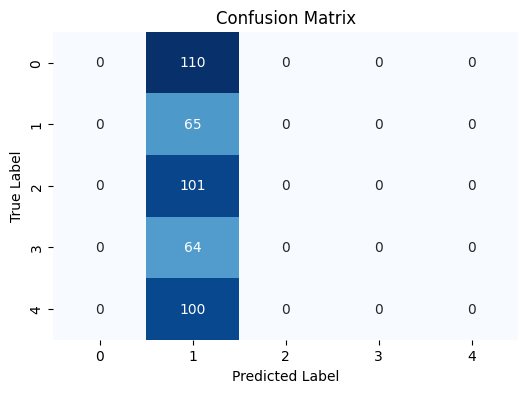

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predict probabilities on test data
pred_probs = model.predict(test_data)

# For binary classification, threshold probabilities at 0.5 to get predicted labels
pred_labels = (pred_probs > 0.5).astype("int32")

# Compute the confusion matrix
cm = confusion_matrix(test_labels, pred_labels)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(test_labels, pred_labels))

# Plot confusion matrix using Seaborn for better visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()